In [0]:
 rm -rf Dataset_Colored/

In [16]:
!git clone https://github.com/Nikhilkohli1/Dataset_Colored.git

Cloning into 'Dataset_Colored'...
remote: Enumerating objects: 221703, done.
remote: Total 221703 (delta 0), reused 0 (delta 0), pack-reused 221703
Receiving objects: 100% (221703/221703), 1.60 GiB | 15.66 MiB/s, done.
Resolving deltas: 100% (446/446), done.
Checking out files: 100% (221786/221786), done.


In [0]:
!pip install tqdm

In [0]:
import os, cv2, math
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [12]:
path = "Dataset_Colored/Examples_Words224/"
gesture_list = []
for file in os.listdir(path):
    if "_" in file[8::][:-4]:
        gesture_list.append(file[8::][:-4].replace('_', ' '))
    else:
        gesture_list.append(file[8::][:-4])
gesture_list

['the Weather',
 'Tell me',
 'Music',
 'two',
 'What is',
 'Play some',
 'plus',
 'Ok Google',
 'the Time',
 'a Joke']

This project is run using google collab GPU.

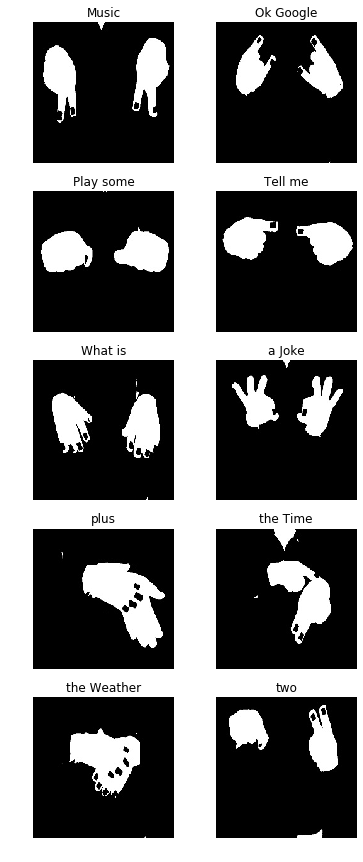

In [18]:
path = "Dataset_Colored/Examples_Words224/"
gesture_list = []
for file in os.listdir(path):
    if "_" in file[8::][:-4]:
        gesture_list.append(file[8::][:-4].replace('_', ' '))
    else:
        gesture_list.append(file[8::][:-4])
gesture_list.sort()
nrow, ncol = 5, 2
plt.rcParams['figure.figsize'] = (ncol*3, nrow*3)
for row in range(nrow):
    for col in range(ncol):
        img_index = row*ncol+col
        # load image
        img = image.load_img('Dataset_Colored/Examples_Words224/example_' + gesture_list[img_index] + '.jpg', target_size = (224, 224))
        plt.subplot(nrow, ncol, img_index + 1)
        plt.imshow(img)
        plt.title(gesture_list[img_index])
        plt.axis('off')

This project aims to create a classifier that can intepret sign language for few words which we will train the model on. The image of the sign language for respective word is shown above.

Inside 'Sign-Language-Digits-Dataset/Dataset/', the images of different sign language are organised according to their labels. The dataset will first be divided into 3 sets : training_set, validation_set, and test_set. The size of training set, validation set, and test set are 70%, 15% and 15% of the whole dataset respectively.

To accomodate for the requirement for flow_from_directory method from keras, I will reorganise the images in the following structure :

* Training set : 'Sign-Language-Digits-Dataset/Dataset/training_set/class_00/image_file'
* Validation set : 'Sign-Language-Digits-Dataset/Dataset/validation_set/class_00/image_file'
* Test set : 'Sign-Language-Digits-Dataset/Dataset/test_set/class_00/image_file'

In [0]:
DATASET_PATH = 'Dataset_Colored/Words224/'

In [0]:
# Creating a list of filename for training set, validation set, and test set
train_set = {}
validation_set = {}
test_set = {}
for cat in os.listdir(DATASET_PATH):
    cat_dir = os.path.join(DATASET_PATH, cat) # e.g. DATASET_PATH/'0'
    cat_files = os.listdir(cat_dir)
      # Training set's size is 60% of the data
    train_list , test_list = train_test_split(cat_files, test_size = 0.3)
      # Validation set's and Test set's size are both 15% of the data
    validation_list, test_list = train_test_split(test_list, test_size = 0.5)
    train_set[cat] = train_list
    validation_set[cat] = validation_list
    test_set[cat] = test_list

In [21]:
for cat in tqdm(train_set.keys()):
    cat_dir = os.path.join(DATASET_PATH, 'training_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in train_set[cat]:
        src = os.path.join(DATASET_PATH, cat, file)
    # dest path is DATASET_PATH/'training_set'/'class_00'
    # to accomodate for the directory format required by flow_from_directory method in keras
        dest = os.path.join(cat_dir, file)
        copyfile(src, dest)

100%|██████████| 10/10 [00:01<00:00,  5.92it/s]


In [22]:
for cat in tqdm(validation_set.keys()):
    cat_dir = os.path.join(DATASET_PATH, 'validation_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in validation_set[cat]:
        src = os.path.join(DATASET_PATH, cat, file)
        # dest path is DATASET_PATH/'validation_set'/'class_00'
        # to accomodate for the directory format required by flow_from_directory method in keras
        dest = os.path.join(cat_dir, file)
        copyfile(src, dest)

100%|██████████| 10/10 [00:00<00:00, 28.34it/s]


In [23]:
for cat in tqdm(test_set.keys()):
    cat_dir = os.path.join(DATASET_PATH, 'test_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in test_set[cat]:
        src = os.path.join(DATASET_PATH, cat, file)
    # dest path is DATASET_PATH/'test_set'/'class_00'
    # to accomodate for the directory format required by flow_from_directory method in keras
        dest = os.path.join(cat_dir, file)
        copyfile(src, dest)

100%|██████████| 10/10 [00:00<00:00, 28.14it/s]


In [25]:
for gesture in gesture_list:
    train_size = len(train_set[gesture])
    validation_size = len(validation_set[gesture])
    test_size = len(test_set[gesture])
    print("{} : Training size({}) Validation size({}) Test size({})".format(gesture, train_size, validation_size, test_size))

Music : Training size(1360) Validation size(292) Test size(292)
Ok Google : Training size(1386) Validation size(297) Test size(298)
Play some : Training size(1379) Validation size(296) Test size(296)
Tell me : Training size(1400) Validation size(300) Test size(300)
What is : Training size(1400) Validation size(300) Test size(300)
a Joke : Training size(1304) Validation size(279) Test size(280)
plus : Training size(1115) Validation size(239) Test size(239)
the Time : Training size(1386) Validation size(297) Test size(297)
the Weather : Training size(1381) Validation size(296) Test size(297)
two : Training size(1050) Validation size(225) Test size(225)


Data augmentation is performed on the training set images so that the classifier can learn any changes with respect to scaling, horizontal_flip, or others.

In [26]:
# Performing data augmentation on training dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# For validation dataset, only rescale the pictures
validation_datagen = ImageDataGenerator(rescale = 1./255)

# For test dataset, only rescale the pictures
test_datagen = ImageDataGenerator(rescale = 1./255)

training_data = train_datagen.flow_from_directory(os.path.join(DATASET_PATH, 'training_set'),
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_data = validation_datagen.flow_from_directory(os.path.join(DATASET_PATH, 'validation_set'),
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(os.path.join(DATASET_PATH, 'test_set'),
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 13161 images belonging to 10 classes.
Found 2821 images belonging to 10 classes.
Found 2824 images belonging to 10 classes.


For this dataset, I will be using the following infrastructure.



In [28]:
# Initialising the CNN
classifier = Sequential()

# Adding first convolutional layer, followed by pooling, and dropout
classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Adding second convolutional layer, followed by pooling, and dropout
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Adding third convolutional layer, followed by pooling, and dropout
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 32)        9248      
__________

In [29]:
# Train the data with training set, and check the result with validation accuracy
history = classifier.fit_generator(training_data,
                         steps_per_epoch = math.ceil(training_data.n / training_data.batch_size),
                         epochs = 10,
                         validation_data = validation_data,
                         validation_steps = math.ceil(validation_data.n / validation_data.batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
412/412 [==============================] - 180s 436ms/step - loss: 0.1960 - acc: 0.9373 - val_loss: 0.0081 - val_acc: 0.9972
Epoch 2/10
412/412 [==============================] - 172s 418ms/step - loss: 0.0189 - acc: 0.9939 - val_loss: 0.0253 - val_acc: 0.9918
Epoch 3/10
412/412 [==============================] - 172s 416ms/step - loss: 0.0128 - acc: 0.9964 - val_loss: 2.0299e-04 - val_acc: 1.0000
Epoch 4/10
412/412 [==============================] - 173s 419ms/step - loss: 0.0101 - acc: 0.9965 - val_loss: 0.0048 - val_acc: 0.9975
Epoch 5/10
412/412 [==============================] - 173s 419ms/step - loss: 0.0079 - acc: 0.9971 - val_loss: 7.0933e-04 - val_acc: 0.9996
Epoch 6/10
412/412 [==============================] - 173s 419ms/step - loss: 0.0081 - acc: 0.9980 - val_loss: 9.4450e-04 - val_acc: 0.9996
Epoch 7/10
412/412 [==============================] - 173s 419ms/step - loss: 0.0059 - acc: 0.9983 - val_loss: 4.7414e-04 - 

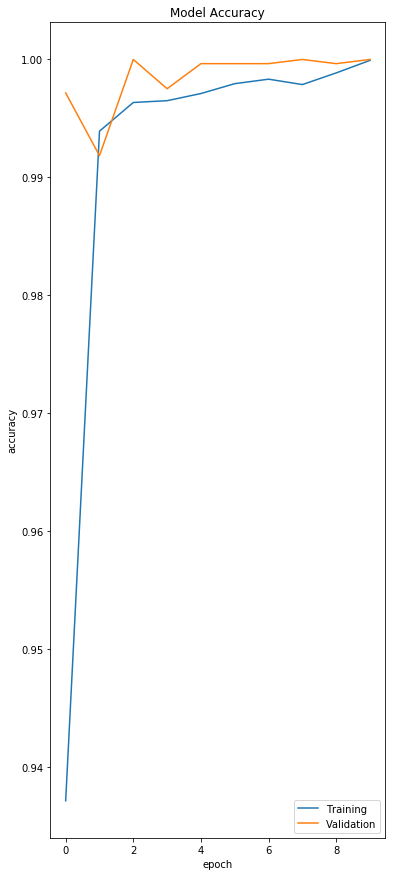

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'])

From the accuracy plot, the validation accuracy differs from the training accuracy by a small extent indicating absence of overfitting. When the classifier is evaluated on the test set, it obtains a relatively high accuracy.

In [31]:
# Accuracy of the classifier when evaluated based on the test_set
test_loss, test_accuracy = classifier.evaluate_generator(test_data, math.ceil(test_data.n / test_data.batch_size))
print("Accuracy on test set : {}".format(test_accuracy))

Accuracy on test set : 1.0


To visualise the performance of the classifier, the classifier will be used to predict all the example images for 0 to 9.

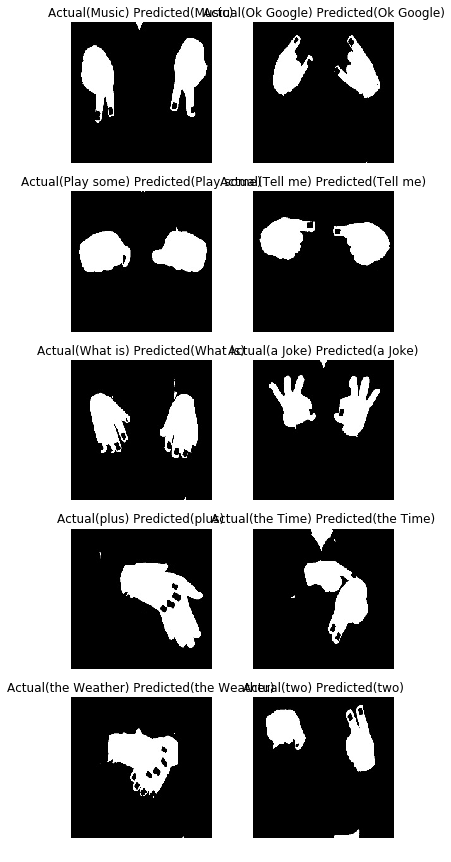

In [32]:
nrow, ncol = 5, 2
# plt.rcParams['figure.figsize'] = (ncol*3, nrow*3)
for row in range(nrow):
    for col in range(ncol):
        img_index = row*ncol+col
        # load image
#         print(img_index)
#         path = "Gestures-Dataset/Examples/example_" + gesture_list[img_index] + ".jpg"
#         print("Path: ",path)
        img = image.load_img('Dataset_Colored/Examples_Words224/example_' + gesture_list[img_index] + '.jpg', target_size = (224, 224))
#         plt.imshow(img)
        # convert image into array for prediction
        test_image = image.img_to_array(img)
        test_image = np.expand_dims(test_image, axis = 0)
        # predict image using classifier
        result = classifier.predict(test_image).argmax()
        plt.subplot(nrow, ncol, img_index + 1)
        plt.imshow(img)
        plt.title("Actual({}) Predicted({})".format(gesture_list[img_index], gesture_list[result]))
        plt.axis('off')

It can be seen from above output that the classifier is able to classify all the images correctly. To save the model for future use, simply run the code below.

In [33]:
# save the models and weight for future purposes
# serialize model to JSON
model_json = classifier.to_json()
with open("model_words224.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save("model_words224.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
import keras
print(keras.__version__)

2.2.4


# Reference

* https://github.com/ardamavi/Sign-Language-Digits-Dataset
* https://www.superdatascience.com/deep-learning/